In [1]:
import pandas as pd

In [2]:
import sklearn

In [3]:
import seaborn as sns

In [4]:
import numpy as np

In [5]:
sklearn.__version__

'1.0.2'

In [6]:
pd.__version__

'1.4.2'

In [7]:
#!pip install pyarrow

In [8]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2025-01.parquet')

In [9]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0,0.0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0,0.0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0,0.0
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0,0.0
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0,0.0


In [10]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee',
       'cbd_congestion_fee'],
      dtype='object')

In [11]:
len(df.columns)

20

In [12]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].apply(lambda x: x.total_seconds()/60)

In [13]:
df['duration'].mean(), df['duration'].std()

(15.018115617997632, 38.71358219513072)

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

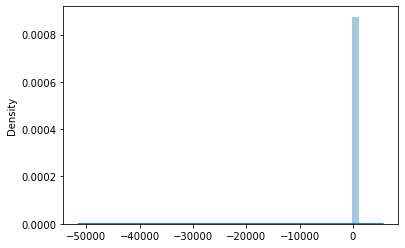

In [14]:
sns.distplot(x=df['duration'], kde='False')

In [15]:
len(df[(df['duration']>=1) & (df['duration']<=60)])/len(df)

0.9792882534833706

In [16]:
df = df[(df['duration']>=1) & (df['duration']<=60)]

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

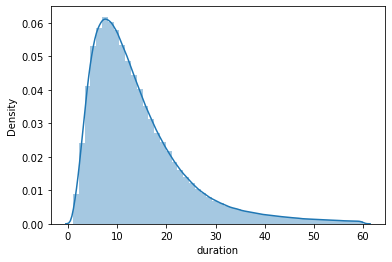

In [17]:
sns.distplot(df['duration'], kde='False')

In [18]:
features = ['PULocationID', 'DOLocationID']
df[features] = df[features].astype(str)
train_dicts = df[features].to_dict(orient='records')

In [19]:
train_dicts

[{'PULocationID': '229', 'DOLocationID': '237'},
 {'PULocationID': '236', 'DOLocationID': '237'},
 {'PULocationID': '141', 'DOLocationID': '141'},
 {'PULocationID': '244', 'DOLocationID': '244'},
 {'PULocationID': '244', 'DOLocationID': '116'},
 {'PULocationID': '239', 'DOLocationID': '68'},
 {'PULocationID': '170', 'DOLocationID': '170'},
 {'PULocationID': '234', 'DOLocationID': '148'},
 {'PULocationID': '148', 'DOLocationID': '170'},
 {'PULocationID': '237', 'DOLocationID': '262'},
 {'PULocationID': '237', 'DOLocationID': '75'},
 {'PULocationID': '263', 'DOLocationID': '236'},
 {'PULocationID': '236', 'DOLocationID': '151'},
 {'PULocationID': '229', 'DOLocationID': '141'},
 {'PULocationID': '141', 'DOLocationID': '113'},
 {'PULocationID': '158', 'DOLocationID': '170'},
 {'PULocationID': '164', 'DOLocationID': '229'},
 {'PULocationID': '79', 'DOLocationID': '107'},
 {'PULocationID': '79', 'DOLocationID': '107'},
 {'PULocationID': '246', 'DOLocationID': '90'},
 {'PULocationID': '263', 

In [20]:
from sklearn.feature_extraction import DictVectorizer

In [21]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [22]:
X_train

<3403248x519 sparse matrix of type '<class 'numpy.float64'>'
	with 6806496 stored elements in Compressed Sparse Row format>

In [23]:
X_train.shape

(3403248, 519)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()
lr.fit(X_train, df['duration'])

LinearRegression()

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
y_train_pred = lr.predict(X_train)
np.sqrt(mean_squared_error(df['duration'], y_train_pred))

7.70782102983464

In [28]:
def Xy_from_parquet(filename, dv):
    df = pd.read_parquet(filename)
    df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
    df['duration'] = df['duration'].apply(lambda x: x.total_seconds()/60)
    df = df[(df['duration']>=1) & (df['duration']<=60)]
    features = ['PULocationID', 'DOLocationID']
    df[features] = df[features].astype(str)
    feature_dicts = df[features].to_dict(orient='records')
    X_features = dv.transform(feature_dicts)
    y = df['duration']
    return X_features, y

In [29]:
#X_val, y_val =  Xy_from_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet', dv)

In [30]:
#y_pred = lr.predict(X_val)
#np.sqrt(mean_squared_error(y_val, y_pred))

In [31]:
df_val = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [32]:
df_val['duration'] = df_val['tpep_dropoff_datetime'] - df_val['tpep_pickup_datetime']
df_val['duration'] = df_val['duration'].apply(lambda x: x.total_seconds()/60)
df_val = df_val[(df_val['duration']>=1) & (df_val['duration']<=60)]
features = ['PULocationID', 'DOLocationID']
df_val[features] = df_val[features].astype(str)
val_dicts = df_val[features].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [33]:
y_pred = lr.predict(X_val)
np.sqrt(mean_squared_error(df_val['duration'], y_pred))

7.8475756541269295